In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.utils.data as tdata
from torch import optim
from torch import device as dev
from sklearn.metrics import classification_report
from sklearn import model_selection
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_transforms = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()])
image_datasets = torchvision.datasets.ImageFolder('/content/drive/MyDrive/Softcom Assignments/Assignment 01/group/imagery', transform = image_transforms)
devset_indices = np.arange(len(image_datasets))
devset_labels = image_datasets.targets
train_indices, test_indices, train_labels, test_labels = model_selection.train_test_split(devset_indices, devset_labels, test_size=0.8, stratify=devset_labels, shuffle=True)
test_image_datasets = tdata.Subset(image_datasets, test_indices)
train_image_datasets = tdata.Subset(image_datasets, test_indices)

test_loader = DataLoader(test_image_datasets, batch_size=20)
train_loader = DataLoader(train_image_datasets, batch_size=20)

In [ ]:
class NN(nn.Module):
    def __init__(self, input_dim):
        super(NN, self).__init__()
        self.linear_0 = nn.Linear(input_dim,100)
        self.linear_1 = nn.Linear(100,100)
        self.linear_2 = nn.Linear(100,100)
        self.linear_3 = nn.Linear(100,100)
        self.linear_4 = nn.Linear(100,100)
        self.linear_5 = nn.Linear(100,4)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.linear_0(x)
        x = self.relu(x)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.linear_2(x)
        x = self.relu(x)
        x = self.linear_3(x)
        x = self.relu(x)
        x = self.linear_4(x)
        x = self.relu(x)
        x = self.linear_5(x)
        x = self.softmax(x)
        return x


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.linear1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


# Training with NN

In [ ]:
image_dim = 32*32*3
nn_model = NN(image_dim)

epoch = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=0.001)

In [ ]:
loss_per_epoch = []

for i in range(epoch):
    train_loss = 0
    iteration = 0
    for data in train_loader:
        image, label = data
        nn_model.zero_grad()
        pred = nn_model(image.view(-1, image_dim))
        loss = loss_fn(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        iteration += 1

    print('Epoch', i + 1, 'Loss', train_loss / iteration)
    loss_per_epoch.append(train_loss / iteration)

Epoch 1 Loss 1.35827673541175
Epoch 2 Loss 1.2984697017404767
Epoch 3 Loss 1.247294169002109
Epoch 4 Loss 1.203414789835612
Epoch 5 Loss 1.1651639077398512
Epoch 6 Loss 1.131738633248541
Epoch 7 Loss 1.1025526424249013
Epoch 8 Loss 1.0772235453128816
Epoch 9 Loss 1.0554103987084495
Epoch 10 Loss 1.0368278519974814


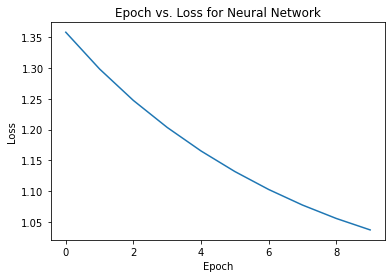

In [ ]:
plt.plot(loss_per_epoch)
plt.title('Epoch vs. Loss for Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
result = 0
iteration = 0
with torch.no_grad():
  for data in test_loader:
    image, label = data
    pred = nn_model(image.view(-1, image_dim))
    for id, i in enumerate(pred):
      if torch.argmax(i) == label[id]:
        result += 1
      iteration += 1

accuracy = result / iteration
print('Accuracy:', accuracy)

Accuracy: 0.6692693809258227


# Training with CNN

In [ ]:
cnn_model = CNN()

epoch = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001)

In [ ]:
loss_per_epoch = []

for i in range(epoch):
    train_loss = 0
    iteration = 0
    for data in train_loader:
        image, label = data
        cnn_model.zero_grad()
        pred = cnn_model(image)
        loss = loss_fn(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        iteration += 1

    print('Epoch', i + 1, 'Loss', train_loss / iteration)
    loss_per_epoch.append(train_loss / iteration)

Epoch 1 Loss 2.2825814618004694
Epoch 2 Loss 2.190309042400784
Epoch 3 Loss 2.1009400619400873
Epoch 4 Loss 2.0135175128777822
Epoch 5 Loss 1.9259133948220146
Epoch 6 Loss 1.8360498646895091
Epoch 7 Loss 1.738275886244244
Epoch 8 Loss 1.6244264794720544
Epoch 9 Loss 1.4771045717928144
Epoch 10 Loss 1.2872622973389096


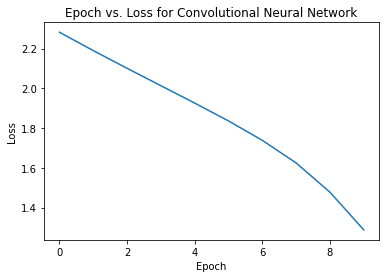

In [ ]:
plt.plot(loss_per_epoch)
plt.title('Epoch vs. Loss for Convolutional Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
result = 0
iteration = 0
with torch.no_grad():
  for data in test_loader:
    image, label = data
    pred = cnn_model(image)
    for id, i in enumerate(pred):
      if torch.argmax(i) == label[id]:
        result += 1
      iteration += 1

accuracy = result / iteration
print('Accuracy:', accuracy)

Accuracy: 0.78227698259369026
